# Ada Final Project - EDA

In [50]:
import bz2
import json

import pandas as pd

import matplotlib.pyplot as plt

In [51]:
PATH_TO_FILE = 'hillary-and-trump-quotes-2016.json.bz2'
QUOTEBANK_COLUMNS = ['quoteID', 'quotation', 'speaker', 'qids', 'date', 'numOccurrences', 'probas', 'urls', 'phase']

CHUNK_SIZE = 100_000

RANDOM_SAMPLE_SIZE = 1_000

SEED = 92813

## Read Data

In [48]:
df_reader = pd.read_json(PATH_TO_FILE, lines=True, compression='bz2') #chunksize=CHUNK_SIZE)

We will also want to investigate the characteristics of the dataset, especially distributions, etc.
Instead of running such investigations on the entire dataset we will apply it to a random subset.

In [52]:
sample = df_reader.sample(n=RANDOM_SAMPLE_SIZE, random_state=SEED)

trump_sample = df_reader[df_reader['speaker'] == 'Donald Trump'].sample(n=RANDOM_SAMPLE_SIZE, random_state=SEED)
hillary_sample = df_reader[df_reader['speaker'] == 'Hillary Clinton'].sample(n=RANDOM_SAMPLE_SIZE, random_state=SEED)

## Clean Data

We are only interested in quotes by **Hillary Clinton** and **Donald Trump** during the **year 2016**, specifically from 01/01/2016 - 01/01/2017. The subset loaded only contains the Quotebank quotes which have one (or both) of them as a possible speaker in the _speaker_ columns list and that lie in the specified time frame.

Since the dataset was obtained using a ML model to extract and assign the quotes there will most likely be quotes which are faulty and quotes which have been assigned to the wrong speaker. The goal of the data cleaning is to remove such data points so that we can focus on working with as good data as possible.

We must specify what makes a quote faulty and motivate this so that we remove as many bad quotes as possible while not removing any or as little actually correct quotes as possible.

### Filter: Remove quotes with low probas



Min Proba (Trump): 0.2674
Min Proba (Hillary): 0.281




<Figure size 432x288 with 0 Axes>

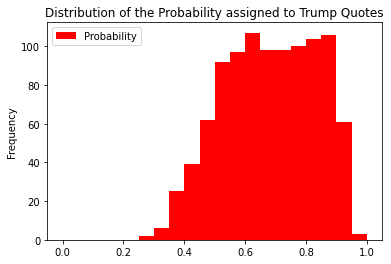

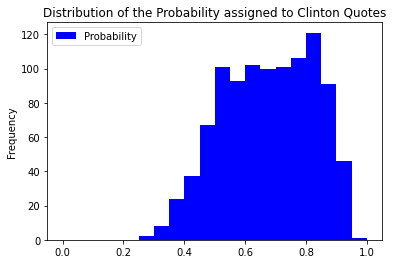

In [82]:
# Inspecting the distribution of probas

probas_sample = sample["probas"].apply(lambda probas : [probas[0][0], float(probas[0][1])])
probas_sample = pd.DataFrame(probas_sample.values.tolist(), columns=["Speaker", "Probability"])

trump_probas_sample = trump_sample["probas"].apply(lambda probas : [probas[0][0], float(probas[0][1])])
trump_probas_sample = pd.DataFrame(trump_probas_sample.values.tolist(), columns=["Speaker", "Probability"])

hillary_probas_sample = hillary_sample["probas"].apply(lambda probas : [probas[0][0], float(probas[0][1])])
hillary_probas_sample = pd.DataFrame(hillary_probas_sample.values.tolist(), columns=["Speaker", "Probability"])

plt.figure();

n_bins = 20
proba_bins= [(1 / n_bins)*i for i in range(0,n_bins  + 1)]

trump_probas_sample.plot.hist(bins=proba_bins,color="red", xlabel="Frequency", ylabel="Probability", title="Distribution of the Probability assigned to Trump Quotes")
hillary_probas_sample.plot.hist(bins=proba_bins, color="blue", xlabel="Frequency", ylabel="Probability", title="Distribution of the Probability assigned to Clinton Quotes")

print("\n\nMin Proba (Trump): " + str(min(trump_probas_sample['Probability'])))
print("Min Proba (Hillary): " + str(min(hillary_probas_sample['Probability'])) + "\n\n")



From plotting the distribution of probabilities which the model computed to the quotes it assigned to Trump and Hillary respectively we could now act in 2 ways:

1. Remove any quote which is below the min probability minus a small margin because they are outliers.
2. Set the cutoff even higher because we decide to consider quotes with, ex. less than 0.4 probability assigned to the candidate being the speaker to weak to conasider it in further analysis.

**TODO:** What should we do? What is scientifically sound? How do we motivate it?

A further possibility could be to remove quotes, where the next best speaker assigned has a similair/close probability compare to the number one.

Example: _"[ [ 'Trump', 0.41 ], [ 'Kanye West', 0.39 ],...]"_

In [ ]:
PROBAS_CUTOFF_VALUE = 0.4

### Filter: Remove Quotes with "nonsense" content

### Enhancer: Correct weird symbols, characters, etc.

### Enhancer: Mark all duplicates